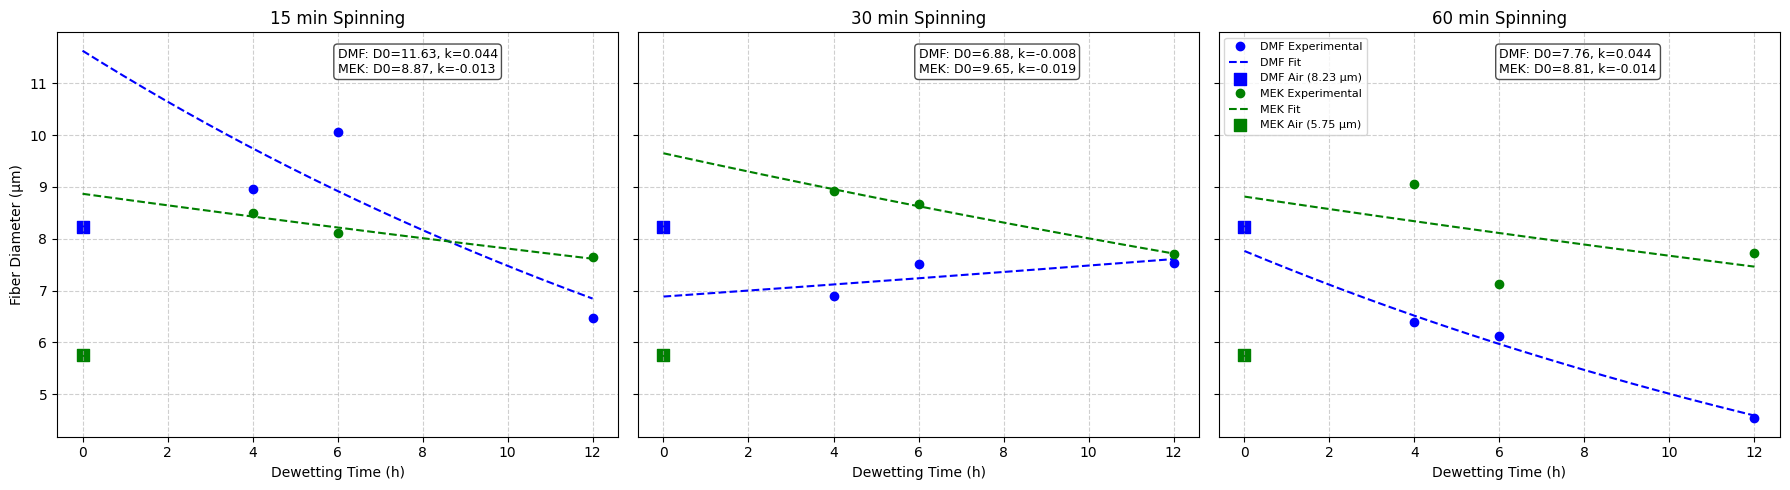

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

time = np.array([4, 6, 12])  # Dewetting times in hours

# DMF fiber diameters
dmf_15 = np.array([8.96, 10.07, 6.47])
dmf_30 = np.array([6.90, 7.52, 7.54])
dmf_60 = np.array([6.40, 6.13, 4.53])

# MEK fiber diameters
mek_15 = np.array([8.50, 8.12, 7.64])
mek_30 = np.array([8.92, 8.68, 7.70])
mek_60 = np.array([9.06, 7.12, 7.73])

# Electrospinning in air (reference)
dmf_air = 8.23
mek_air = 5.75

# Exponential models
def exp_decay(t, D0, k):
    return D0 * np.exp(-k * t)

def exp_growth(t, D0, k):
    return D0 * np.exp(k * t)

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

datasets = [
    ("15 min Spinning", dmf_15, mek_15),
    ("30 min Spinning", dmf_30, mek_30),
    ("60 min Spinning", dmf_60, mek_60),
]

for ax, (title, dmf_data, mek_data) in zip(axes, datasets):
    # Fit DMF
    params_dmf, _ = curve_fit(exp_decay, time, dmf_data, p0=(dmf_data[0], 0.1))
    # Fit MEK
    params_mek, _ = curve_fit(exp_growth, time, mek_data, p0=(mek_data[0], 0.05))

    # Smooth curves
    t_smooth = np.linspace(0, 12, 200)
    fit_dmf = exp_decay(t_smooth, *params_dmf)
    fit_mek = exp_growth(t_smooth, *params_mek)

    # DMF plot
    ax.plot(time, dmf_data, 'o', color='blue', label='DMF Experimental')
    ax.plot(t_smooth, fit_dmf, '--', color='blue', label='DMF Fit')
    ax.scatter([0], [dmf_air], color='blue', marker='s', s=80, label=f'DMF Air ({dmf_air} μm)')

    # MEK plot
    ax.plot(time, mek_data, 'o', color='green', label='MEK Experimental')
    ax.plot(t_smooth, fit_mek, '--', color='green', label='MEK Fit')
    ax.scatter([0], [mek_air], color='green', marker='s', s=80, label=f'MEK Air ({mek_air} μm)')

    # Title and grid
    ax.set_title(title)
    ax.set_xlabel("Dewetting Time (h)")
    ax.grid(True, linestyle='--', alpha=0.6)

    # Add fitted parameters inside subplot
    ax.text(0.5, 0.9,
            f"DMF: D0={params_dmf[0]:.2f}, k={params_dmf[1]:.3f}\n"
            f"MEK: D0={params_mek[0]:.2f}, k={params_mek[1]:.3f}",
            transform=ax.transAxes,
            fontsize=9, bbox=dict(boxstyle="round", fc="white", alpha=0.7))

axes[0].set_ylabel("Fiber Diameter (μm)")
axes[-1].legend(loc="best", fontsize=8)

plt.tight_layout()
plt.show()
